In [1]:
from keras.datasets import mnist
from keras.utils import np_utils
import numpy
import sys
import tensorflow as tf

Using TensorFlow backend.


In [36]:
(xTrain,yTrain),(xTest,yTest)=mnist.load_data()
xTrain.shape
xTest.shape

(10000, 28, 28)

In [3]:
import matplotlib.pyplot as plt

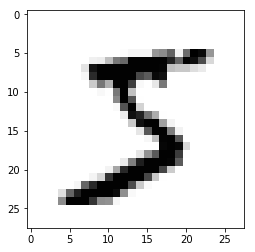

In [4]:
plt.imshow(xTrain[0], cmap='Greys')
plt.show()

In [6]:
for x in xTrain[0]:
    for i in x:
        sys.stdout.write("%d\t" % i)
    sys.stdout.write("\n")

0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	3	18	18	18	126	136	175	26	166	255	247	127	0	0	0	0	
0	0	0	0	0	0	0	0	30	36	94	154	170	253	253	253	253	253	225	172	253	242	195	64	0	0	0	0	
0	0	0	0	0	0	0	49	238	253	253	253	253	253	253	253	253	251	93	82	82	56	39	0	0	0	0	0	
0	0	0	0	0	0	0	18	219	253	253	253	253	253	198	182	247	241	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	80	156	107	253	253	205	11	0	43	154	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	14	1	154	253	90	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	139	253	190	2	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	11	190	253	70	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	35	241	225	160	108	1	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	81	240	253	253	119	25	0	0	0	0	0	0	0	0	0	


In [37]:
xTrain=xTrain.reshape(xTrain.shape[0],784)
xTrain=xTrain.astype('float64')
xTrain=xTrain/255
xTest=xTest.reshape(xTest.shape[0],784).astype('float64')/255

In [10]:
print(yTrain[0])

5


In [38]:
yTrain=np_utils.to_categorical(yTrain,10)
yTest=np_utils.to_categorical(yTest,10)

In [12]:
yTrain[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [14]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint, EarlyStopping
import numpy as np
import tensorflow as tf
import os

In [15]:
#모델 구성
model=Sequential()
model.add(Dense(512, input_dim=784, activation='relu'))
model.add(Dense(10, activation='softmax'))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [16]:
#모델 환경 설정
model.compile(loss="categorical_crossentropy",
             optimizer="adam",
             metrics=['accuracy'])

In [20]:
#모델 최적화
modelDir='./myModel/'
#만약 myModel 디렉토리가 존재하지 않는다면
if not os.path.exists(modelDir):
    modelPath="./myModel/{epoch:02d}-{val_loss:.4f}.hdf5"    
    os.mkdir(modelDir)
checkpointer=ModelCheckpoint(filepath=modelPath, monitor='val_loss', verbose=1, save_best_only=True)
#ModelCheckpoint 콜백 함수: keras에서 모델을 학습할때마다 중간중간에 콜백 형태로 알려줌
#save_best_only:모델의 정확도가 최고값을 갱신했을때만 저장
es=EarlyStopping(monitor='val_loss', patience=10)

In [24]:
#모델 생성 
history=model.fit(xTrain,yTrain,
          validation_data=(xTest,yTest), 
          epochs=30, batch_size=200, 
          callbacks=[es,checkpointer])

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 3s 51us/step - loss: 0.0118 - accuracy: 0.9961 - val_loss: 0.0747 - val_accuracy: 0.9819

Epoch 00001: val_loss did not improve from 0.05838
Epoch 2/30
60000/60000 [==============================] - 3s 51us/step - loss: 0.0032 - accuracy: 0.9992 - val_loss: 0.0627 - val_accuracy: 0.9841

Epoch 00002: val_loss did not improve from 0.05838
Epoch 3/30
60000/60000 [==============================] - 3s 50us/step - loss: 8.2610e-04 - accuracy: 1.0000 - val_loss: 0.0643 - val_accuracy: 0.9840

Epoch 00003: val_loss did not improve from 0.05838
Epoch 4/30
60000/60000 [==============================] - 3s 48us/step - loss: 4.6032e-04 - accuracy: 1.0000 - val_loss: 0.0661 - val_accuracy: 0.9841

Epoch 00004: val_loss did not improve from 0.05838
Epoch 5/30
60000/60000 [==============================] - 3s 49us/step - loss: 3.4299e-04 - accuracy: 1.0000 - val_loss: 0.0657 - val_accuracy: 0.

In [23]:
print("테스트 정확도: %.4f" % (model.evaluate(xTest, yTest)[1]))

10000/10000 [==============================] - 0s 41us/step
테스트 정확도: 0.9788


In [25]:
#테스트 셋의 오차
yVloss=history.history['val_loss'] 
#학습 셋의 오차
yLoss=history.history['loss']

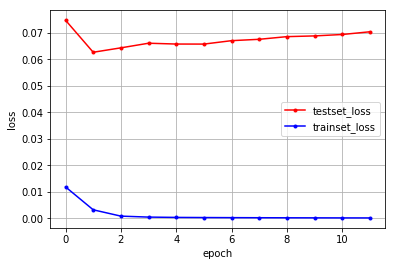

In [27]:
xLen=np.arange(len(yLoss))
plt.plot(xLen,yVloss, marker='.', c='red', 
         label='testset_loss')
plt.plot(xLen,yLoss, marker='.', c='blue', 
         label='trainset_loss')
plt.legend()
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [ ]:
#CNN으로 MNIST 모델 만들기

In [31]:
from keras.layers import *

In [32]:
#모델 구성
model=Sequential()
model.add(Conv2D(32,kernel_size=(3,3),input_shape=(28,28,1), activation='relu'))
#Conv2D(필터개수, 필터크기, (행,열,흑백), 활성화함수)
model.add(Conv2D(64,(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.25)) #드롭아웃 비율(25%)
model.add(Flatten())
#Flatten():1차원으로 변경하는 함수
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))


In [33]:
model.compile(loss="categorical_crossentropy",
             optimizer="adam",
             metrics=['accuracy'])

In [34]:
#모델 최적화
modelDir='./myCnnModel/'
if not os.path.exists(modelDir):
    modelPath="./myCnnModel/{epoch:02d}-{val_loss:.4f}.hdf5"    
    os.mkdir(modelDir)
checkpointer=ModelCheckpoint(filepath=modelPath, monitor='val_loss', verbose=1, save_best_only=True)
#ModelCheckpoint 콜백 함수: keras에서 모델을 학습할때마다 중간중간에 콜백 형태로 알려줌
#save_best_only:모델의 정확도가 최고값을 갱신했을때만 저장
es=EarlyStopping(monitor='val_loss', patience=10)

In [43]:
(xTrain,yTrain),(xTest,yTest)=mnist.
load_data()
xTrain=xTrain.reshape(
    xTrain.shape[0],28,28,1).
astype('float32')/255
xTest=xTest.reshape(
    xTest.shape[0],28,28,1).
astype('float32')/255
yTrain=np_utils.to_categorical(yTrain)
yTest=np_utils.to_categorical(yTest)

In [44]:
#모델 생성 
history=model.fit(xTrain,yTrain,
          validation_data=(xTest,yTest), 
          epochs=30, batch_size=200, 
          callbacks=[es,checkpointer])

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 69s 1ms/step - loss: 0.2669 - accuracy: 0.9191 - val_loss: 0.0531 - val_accuracy: 0.9829

Epoch 00001: val_loss improved from inf to 0.05309, saving model to ./myCnnModel/01-0.0531.hdf5
Epoch 2/30
60000/60000 [==============================] - 70s 1ms/step - loss: 0.0839 - accuracy: 0.9754 - val_loss: 0.0401 - val_accuracy: 0.9859

Epoch 00002: val_loss improved from 0.05309 to 0.04005, saving model to ./myCnnModel/02-0.0401.hdf5
Epoch 3/30
60000/60000 [==============================] - 70s 1ms/step - loss: 0.0639 - accuracy: 0.9808 - val_loss: 0.0326 - val_accuracy: 0.9898

Epoch 00003: val_loss improved from 0.04005 to 0.03258, saving model to ./myCnnModel/03-0.0326.hdf5
Epoch 4/30
60000/60000 [==============================] - 69s 1ms/step - loss: 0.0518 - accuracy: 0.9841 - val_loss: 0.0307 - val_accuracy: 0.9905

Epoch 00004: val_loss improved from 0.03258 to 0.03071, saving

In [45]:
#model.save("모델파일명.h5")
# from keras.models import load_model
# model=load_model("모델파일명.h5")
# model.summary() #모델 구조
# 분류결과=model.predict_classes(테스트 데이터)

In [ ]:
#예측이 틀린 이미지를  8개 출력
# label:9,pred:4   ...       label:1,pred:4
#    9 이미지                  1이미지
# label:9,pred:4   ...       label:1,pred:4
#    9 이미지                  1이미지
# 2*4 형태로 틀린 예측 결과 출력

In [46]:
#이터레이터, 제너레이터
#iterator:값을 차례대로 꺼낼 수 있는 객체

#for i in range(100):
#정확한 의미: 0~99까지 값을 차례대로 꺼낼 수
#있는 이터레이터 객체 생성

In [52]:
#iterable(반복가능객체,문자열,딕셔너리,리스트,셋)
#객체가 iter메서드를 포함 여부:객체가 반복 가능한지 확인
dir([1,2,3]) #__iter__

it=[1,2,3].__iter__()
it.__next__()
it.__next__()
it.__next__()
it.__next__()

StopIteration: 

In [55]:
"hello".__iter__()
{'a':1,'b':2}.__iter__()
{1,2,3}.__iter__()


In [58]:
it=range(3).__iter__()
it.__next__()

0

In [ ]:
for i in range(3):
    print(i)
#1.range에서 __iter__로 이터레이터 객체 생성
#2. 반복할때마다 이터레이터에서 __next__
#를 호출해서 숫자를 꺼내서 i에 저장

In [ ]:
#내가 만든 클래스에 __iter__, __next__
#두 메서드를 구현하면, 이터레이터 생성 가능

In [72]:
class MyCounter:
    def __getitem__(self,index):
        if index<self.stop:
            return index*10
        else:
            raise StopIteration
            
    def __init__(self,stop):
        self.current=0
        self.stop=stop
#     def __iter__(self):
#         return self
#     def __next__(self):
#         if self.current < self.stop:
#             r=self.current
#             self.current+=1
#             return r
#         else :
#             raise StopIteration
    
# for i in MyCounter(3):
#     print(i) # 0 1 2

In [73]:
#MyCounter(3)[0]
for i in MyCounter(3):
    print(i)

0
10
20


In [65]:
a,b,c=MyCounter(3)
print(a,b,c)

0 1 2


In [66]:
a,b,c=map(int,input().split())

1 2 3


In [67]:
print(a)

1


In [77]:
#파이썬 iter함수: 객체의 __iter__ 메서드를 호출
#파이썬 next함수: 객체의 __next__ 메서드를 호출
it=iter(range(3))
next(it)
next(it)
next(it)

2

In [86]:
#iter(객체, 반복을 끝낼값)
import random
it=iter(lambda: random.randint(0,5),2)
next(it)
next(it)
next(it)
next(it)
next(it)

StopIteration: 

In [87]:
#제너레이터:이터레이터를 생성하는 함수,
#함수 내부에 yield 키워드를 주면 이터레이터가 생성됨
def myGen():
    yield 0
    yield 1
    yield 2   

In [88]:
for i in myGen():
    print(i)

0
1
2


In [89]:
mg=myGen()
dir(mg)

['__class__',
 '__del__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__lt__',
 '__name__',
 '__ne__',
 '__new__',
 '__next__',
 '__qualname__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'close',
 'gi_code',
 'gi_frame',
 'gi_running',
 'gi_yieldfrom',
 'send',
 'throw']

In [90]:
#keras.io -> ImageDataGenerator

In [91]:
#1.이미지제너레이터 클래스 객체 생성
#2. flow_from_directory() 호출 -> 제너레이터 생성

from keras.preprocessing.image import ImageDataGenerator

In [101]:
trainDataGen=ImageDataGenerator(rescale=1./255)
trainGenerator=trainDataGen.flow_from_directory(
    'train',
    target_size=(24,24),
    batch_size=3,
    class_mode='categorical'
)

Found 45 images belonging to 3 classes.


In [102]:
testDataGen=ImageDataGenerator(rescale=1./255)
testGenerator=testDataGen.flow_from_directory(
    'test',
    target_size=(24,24),
    batch_size=3,
    class_mode='categorical'
)

Found 15 images belonging to 3 classes.


In [94]:
#크기(24,24), 채널:3, 필터:3*3,필터개수:32,relu
model=Sequential()
model.add(Conv2D(32, kernel_size=(3,3),
                activation='relu',
                input_shape=(24,24,3)))
#필터:3*3,필터개수:64,relu
model.add(Conv2D(64, kernel_size=(3,3),
                activation='relu'))
#maxpool : 2*2
model.add(MaxPooling2D(pool_size=(2,2)))
#플래튼 -> Dense(128개 뉴런 출력)->Dense(softmax)
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(3, activation='softmax'))

In [95]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 22, 22, 32)        896       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 20, 20, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 10, 10, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 6400)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 128)               819328    
_________________________________________________________________
dense_6 (Dense)              (None, 3)                 387       
Total params: 839,107
Trainable params: 839,107
Non-trainable params: 0
________________________________________________

In [96]:
#모델 학습 설정
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [103]:
#fit_generator(): 제너레이터로 생성된 데이터 학습
model.fit_generator(
    trainGenerator, #훈련데이터 제너레이터
    steps_per_epoch=15,
    epochs=50,
    validation_data=testGenerator,
    validation_steps=5)

Epoch 1/50
15/15 [==============================] - 0s 27ms/step - loss: 0.9843 - accuracy: 0.5333 - val_loss: 0.2776 - val_accuracy: 0.8667
Epoch 2/50
15/15 [==============================] - 0s 17ms/step - loss: 0.2386 - accuracy: 0.9333 - val_loss: 0.7369 - val_accuracy: 0.9333
Epoch 3/50
15/15 [==============================] - 0s 19ms/step - loss: 0.0260 - accuracy: 1.0000 - val_loss: 0.0113 - val_accuracy: 0.9333
Epoch 4/50
15/15 [==============================] - 0s 21ms/step - loss: 0.0024 - accuracy: 1.0000 - val_loss: 0.9238 - val_accuracy: 0.9333
Epoch 5/50
15/15 [==============================] - 0s 18ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 4.7798e-04 - val_accuracy: 0.9333
Epoch 6/50
15/15 [==============================] - 0s 21ms/step - loss: 4.6104e-04 - accuracy: 1.0000 - val_loss: 5.2575e-04 - val_accuracy: 0.9333
Epoch 7/50
15/15 [==============================] - 0s 20ms/step - loss: 3.0381e-04 - accuracy: 1.0000 - val_loss: 0.0046 - val_accuracy: 0.93

In [104]:
scores=model.evaluate_generator(
    testGenerator,
    steps=5
)
print(scores)

[8.741937563172542e-06, 0.9333333373069763]


In [105]:
res=model.predict_generator(
    testGenerator,
    steps=5
)
print(res)

[[2.43869908e-06 6.98659429e-03 9.93010938e-01]
 [2.46252068e-08 1.73852939e-07 9.99999762e-01]
 [9.99229908e-01 1.13751785e-05 7.58766313e-04]
 [3.05597823e-05 1.44466937e-01 8.55502546e-01]
 [9.99999046e-01 5.51150094e-07 3.42455536e-07]
 [2.60036131e-06 9.99997377e-01 1.83215709e-09]
 [9.99994159e-01 2.65546169e-06 3.25939959e-06]
 [1.57213520e-07 9.99999881e-01 6.19608698e-10]
 [9.99997497e-01 2.17996217e-06 4.03293598e-07]
 [2.88936377e-08 6.12813983e-06 9.99993801e-01]
 [6.80345297e-01 2.98976183e-01 2.06785146e-02]
 [1.03412890e-06 9.99998927e-01 9.48375689e-09]
 [9.99979138e-01 1.34424063e-05 7.43882447e-06]
 [2.66345154e-07 9.99999762e-01 1.47531640e-10]
 [1.56675539e-09 5.09889605e-06 9.99994874e-01]]


In [106]:
"""
rotation_range : 회전, 90(0~90도 사이 랜덤)
width_shift_range :이동, 0~1사이의 비율, 0.1(이미지 너비의 10% 좌/우 이동)
height_shift_range :이동, 0~1사이의 비율, 0.1(이미지 너비의 10% 상/하 이동)
shear_range : 변형, 라디안, 0.5(반시계방향 밀어서 변행)
zoom_range : 축소, 0.3(0.7~1.3 사이의 크기로 랜덤하게...)
horizontal_flip : 수평축으로 뒤집기
vertical_flip: 수직축으로 뒤집기
"""



'\nrotation_range : 회전, 90(0~90도 사이 랜덤)\nwidth_shift_range :이동, 0~1사이의 비율, 0.1(이미지 너비의 10% 좌/우 이동)\nheight_shift_range :이동, 0~1사이의 비율, 0.1(이미지 너비의 10% 상/하 이동)\nshear_range : 변형, 라디안, 0.5(반시계방향 밀어서 변행)\nzoom_range : 축소, 0.3(0.7~1.3 사이의 크기로 랜덤하게...)\nhorizontal_flip : 수평축으로 뒤집기\nvertical_flip: 수직축으로 뒤집기\n'

In [107]:
from keras.preprocessing.image import 
array_to_img, img_to_array, load_img

In [108]:
augGen=ImageDataGenerator(rescale=1./255,
                  rotation_range=15,
                   width_shift_range=0.1,
                   height_shift_range=0.1,
                   shear_range=0.5,
                   zoom_range=[0.8,2.0],
                   horizontal_flip=True,
                   vertical_flip=True,
                   fill_mode='nearest'
                  )

In [109]:
img=load_img('train/triangle/triangle001.png')

In [113]:
x=img_to_array(img)
x.shape
x=x.reshape((1,)+x.shape)
x.shape

(1, 24, 24, 3)

In [115]:
i=0
for batch in augGen.flow(x,batch_size=1, 
                         save_to_dir='store',
                         save_prefix='tri', 
                         save_format='png'):
    i+=1
    if i>50:
        break